<a href="https://colab.research.google.com/github/dhiraj0807-creator/CANVA-DESIGN-DHIRAJ/blob/main/advancelinearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [166]:
df = pd.read_csv('/usa.csv')


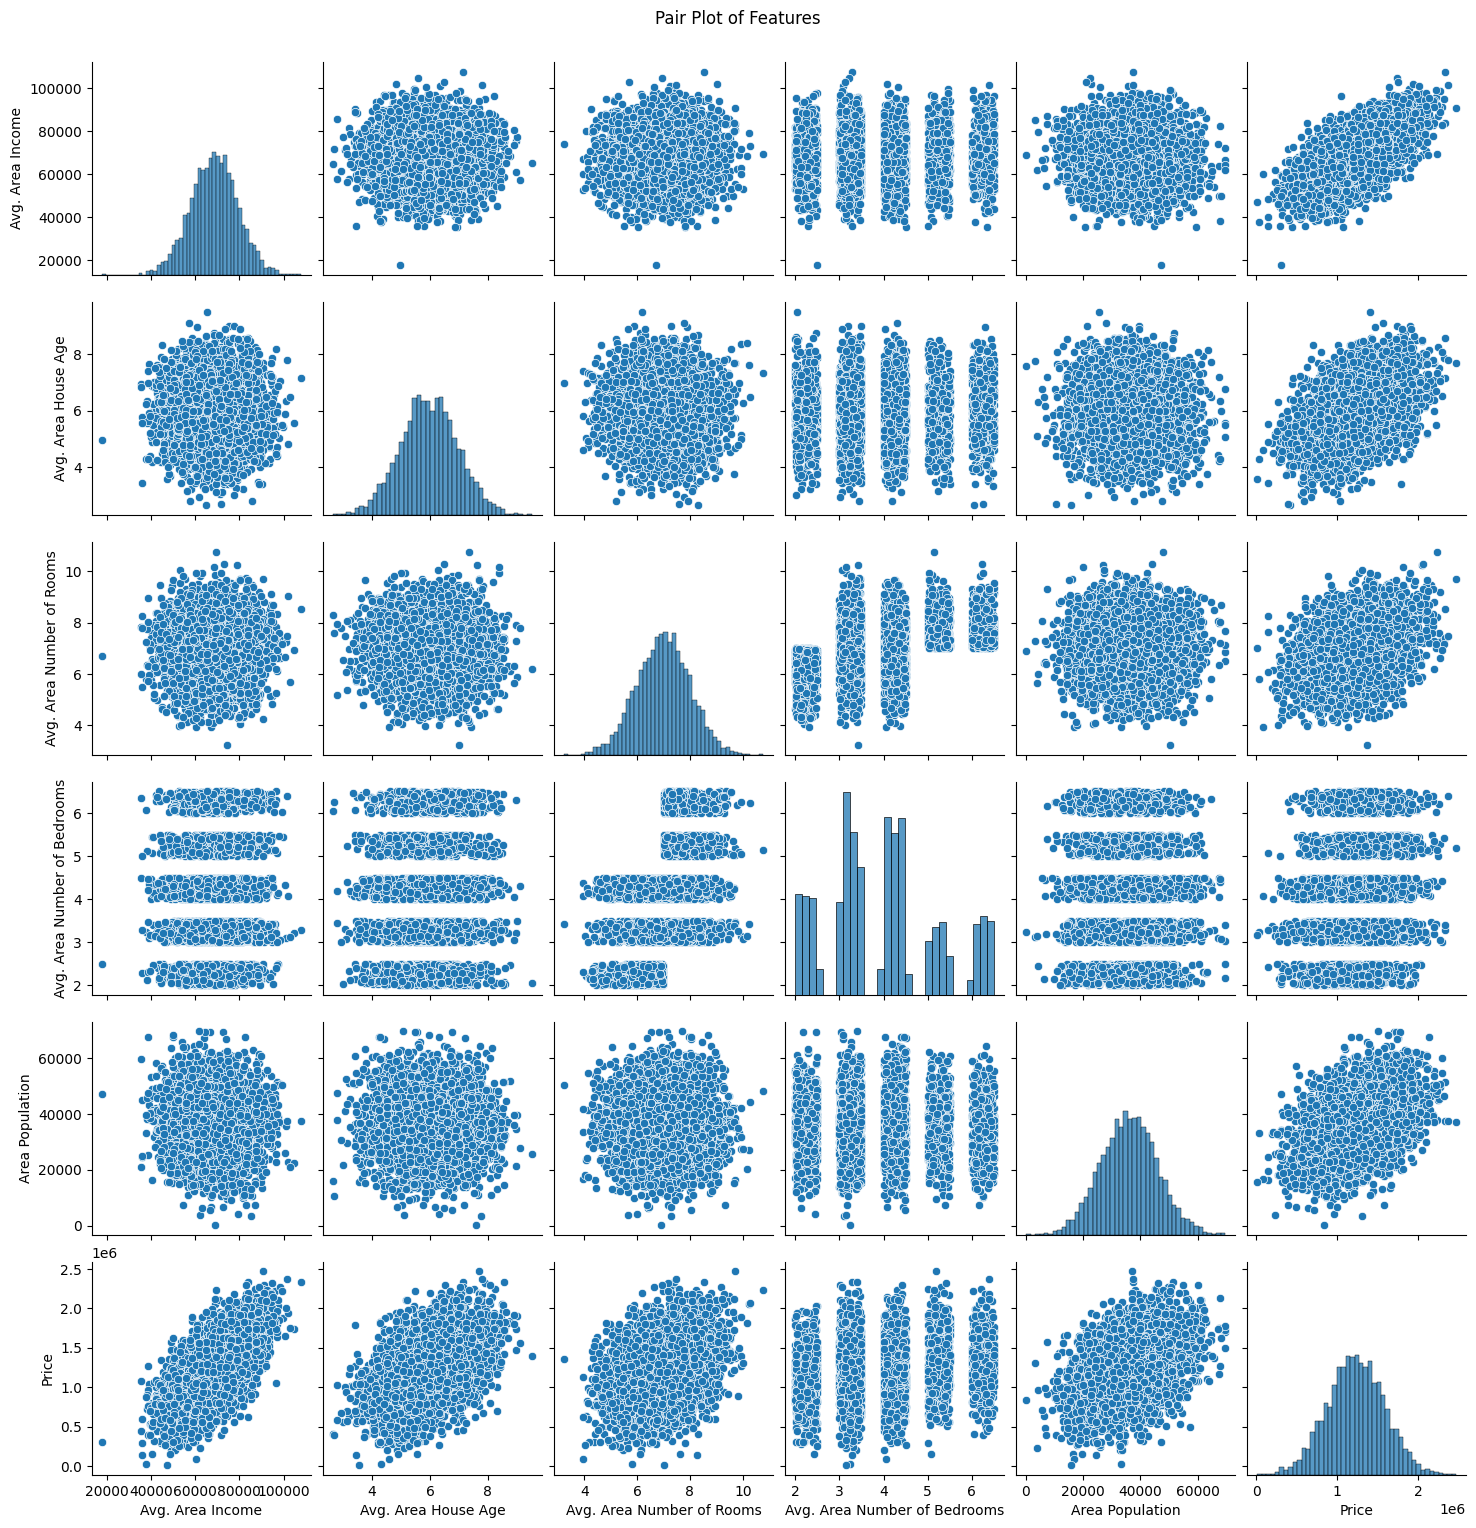

In [167]:
sns.pairplot(df)
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

In [168]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
        'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

X = np.array(X)
y = np.array(y)

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [170]:
X_train1 = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test1 = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

In [171]:
beta_hat = np.linalg.inv(X_train1.T @ X_train1) @ X_train1.T @ y_train
print("Manual OLS")
print(f"Intercept and Coefficients (beta_hat):\n{beta_hat}")


Manual OLS
Intercept and Coefficients (beta_hat):
[-2.64044140e+06  2.15666957e+01  1.65453042e+05  1.20499839e+05
  1.99978534e+03  1.53406038e+01]


 Approach 1: Manual Ordinary Least Squares (OLS)

In [172]:
y_pred_ols = X_test1 @ beta_hat

In [173]:
mse_ols = metrics.mean_squared_error(y_test, y_pred_ols)
mae_ols = metrics.mean_absolute_error(y_test, y_pred_ols)
r2_ols = metrics.r2_score(y_test, y_pred_ols)

print(f"MSE: {mse_ols:.2f}")
print(f"MAE: {mae_ols:.2f}")
print(f"R²: {r2_ols:.4f}")

MSE: 10100187857.00
MAE: 81305.23
R²: 0.9212


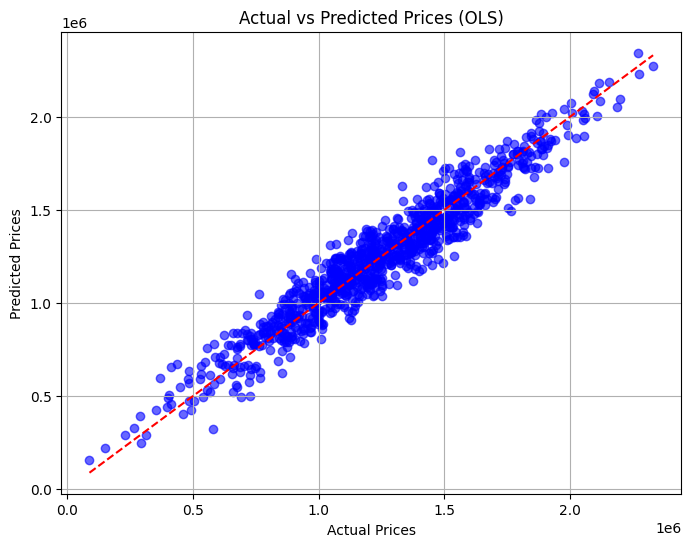

In [174]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_ols, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (OLS)')
plt.grid(True)
plt.show()

Approach 2: Scikit-learn Linear Regression

In [175]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred_sklearn = lm.predict(X_test)

print("Scikit-learn Linear Regression")
print(f"Intercept: {lm.intercept_}")
print(f"Coefficients: {lm.coef_}")

Scikit-learn Linear Regression
Intercept: -2640441.3997800685
Coefficients: [2.15666957e+01 1.65453042e+05 1.20499839e+05 1.99978534e+03
 1.53406038e+01]


In [176]:
mse_sk = metrics.mean_squared_error(y_test, y_pred_sklearn)
mae_sk = metrics.mean_absolute_error(y_test, y_pred_sklearn)
r2_sk = metrics.r2_score(y_test, y_pred_sklearn)
print(f"MSE: {mse_sk:.2f}")
print(f"MAE: {mae_sk:.2f}")
print(f"R²: {r2_sk:.4f}")

MSE: 10100187857.00
MAE: 81305.23
R²: 0.9212


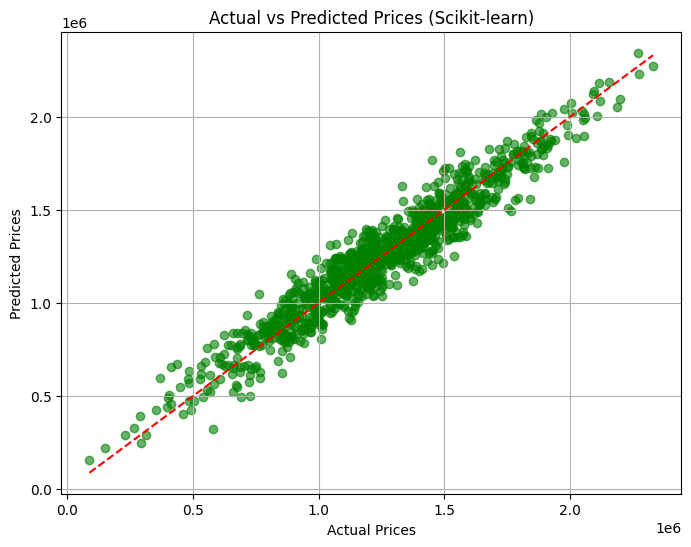

In [177]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_sklearn, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Scikit-learn)')
plt.grid(True)
plt.show()

Approach 3: Gradient Descent (Iterative)

In [178]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [179]:
X_train_scaled = np.hstack((np.ones((X_train_scaled.shape[0],1)), X_train_scaled))
X_test_scaled = np.hstack((np.ones((X_test_scaled.shape[0],1)), X_test_scaled))

def gradient_descent(X, y, learning_rate=0.01, max_epochs=400):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    history = []

    for epoch in range(max_epochs):
        y_pred = X @ weights
        gradient = (2 / n_samples) * X.T @ (y_pred - y)
        weights -= learning_rate * gradient
        loss = np.mean((y - y_pred) ** 2)
        history.append(loss)
        if epoch % 100 == 0:
            print(f"Epoch {epoch+1}: Loss = {loss:.2f}")
        if np.allclose(gradient, 0, atol=1e-6):
            break
    return weights, history

weights_gd, history = gradient_descent(X_train_scaled, y_train, learning_rate=0.01, max_epochs=400)
y_pred_gd = X_test_scaled @ weights_gd

Epoch 1: Loss = 1633188092561.48
Epoch 101: Loss = 39284442667.67
Epoch 201: Loss = 10817437993.95
Epoch 301: Loss = 10268285758.66


In [180]:
mse_gd = metrics.mean_squared_error(y_test, y_pred_gd)
mae_gd = metrics.mean_absolute_error(y_test, y_pred_gd)
r2_gd = metrics.r2_score(y_test, y_pred_gd)

print("Gradient Descent")
print(f"Weights: {weights_gd}")
print(f"MSE: {mse_gd:.2f}")
print(f"MAE: {mae_gd:.2f}")
print(f"R²: {r2_gd:.4f}")


Gradient Descent
Weights: [1228215.4796058   229200.21320251  162847.13133548  119493.14136164
    3326.95054832  152330.44032282]
MSE: 10102613998.95
MAE: 81315.27
R²: 0.9212


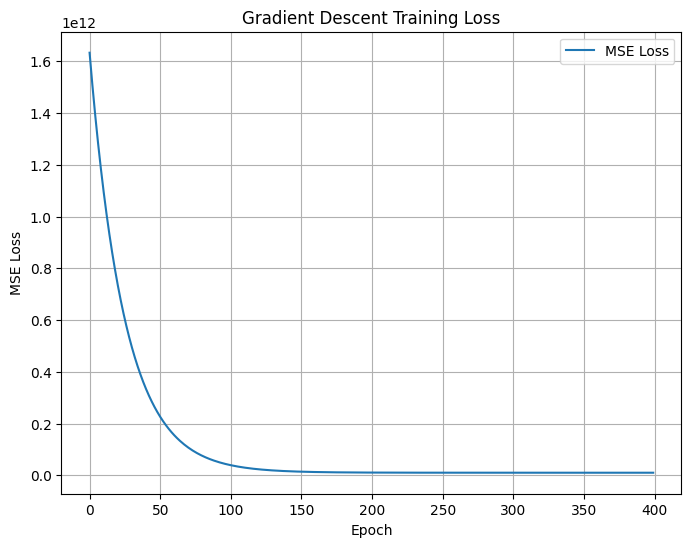

In [181]:
plt.figure(figsize=(8,6))
plt.plot(history, label='MSE Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Gradient Descent Training Loss')
plt.legend()
plt.grid(True)
plt.show()

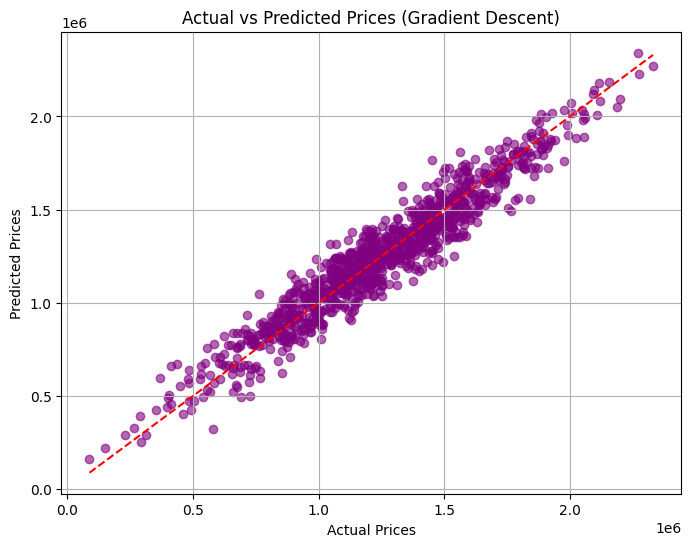

In [182]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_gd, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Gradient Descent)')
plt.grid(True)
plt.show()

Sample Prediction

In [183]:
sample = np.array([1, 68000, 5, 5, 4, 20000])
pred_sample = sample @ beta_hat
print(f"Predicted price for sample data (manual OLS): {pred_sample:.2f}")

Predicted price for sample data (manual OLS): 570669.54
